In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from utils import plot_clustering, add_decision_boundary, plot_dendrogram, scatterplot_pca

In [2]:
# importer données du fichier csv
bigfoot = pd.read_csv("../data/bigfoot.csv", sep = ",")
bigfoot = bigfoot[bigfoot.classification != "Class C"]
bigfoot = bigfoot.assign(
    title = bigfoot.title.str.replace(r'^Report \d*: ', '')
)
bigfoot.classification = bigfoot.classification.replace("Class A", "A")
bigfoot.classification = bigfoot.classification.replace("Class B", "B")
bigfoot.classification = pd.Categorical(bigfoot.classification, categories=["A", "B"], ordered=True)
bigfoot.observed = bigfoot.observed.astype('str')
bigfoot.location_details = bigfoot.location_details.astype('str')
bigfoot.title = bigfoot.title.astype('str')

In [26]:
# https://www.kaggle.com/code/neerajmohan/nlp-text-classification-using-tf-idf-features
X_train, X_test , y_train, y_test = train_test_split(bigfoot["observed"].values, bigfoot.classification.values, test_size=0.66)
tfidf_vectorizer = TfidfVectorizer(stop_words='english') 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# ATTENTION pas de validation faite !!! (c'était vachement long j'ai pas été patiente)

In [44]:
concat = np.c_[ tfidf_train_vectors.toarray(), y_train]

In [53]:
concat_pd = pd.DataFrame(concat, columns = ["a"+str(i) for i in range(concat.shape[1])])
concat_pd

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a16073,a16074,a16075,a16076,a16077,a16078,a16079,a16080,a16081,a16082
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
1,0.058275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072386,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
1692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
1693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B
1694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B


(<Axes: xlabel='PC1', ylabel='PC2'>, PCA(n_components=2))

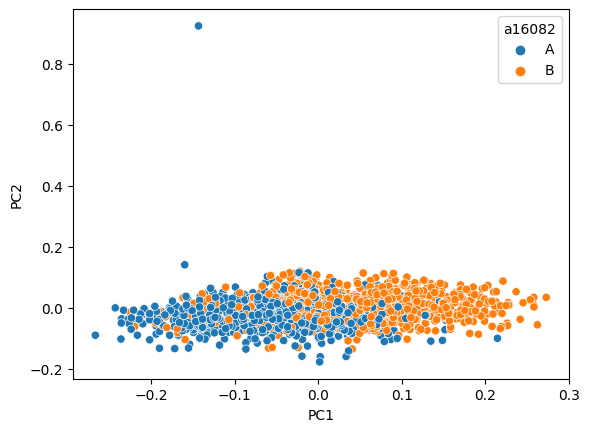

In [54]:
scatterplot_pca(data=concat_pd, hue="a16082")

              precision    recall  f1-score   support

           A       0.71      0.77      0.74      1626
           B       0.75      0.69      0.72      1669

    accuracy                           0.73      3295
   macro avg       0.73      0.73      0.73      3295
weighted avg       0.73      0.73      0.73      3295



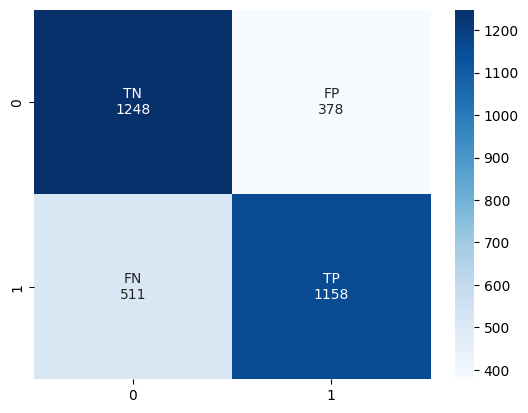

In [23]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred = classifier.predict(tfidf_test_vectors.toarray())
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

/home/miguella/.pyenv/versions/3.10.5/envs/SY09/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           A       1.00      0.00      0.00      1626
           B       0.51      1.00      0.67      1669

    accuracy                           0.51      3295
   macro avg       0.75      0.50      0.34      3295
weighted avg       0.75      0.51      0.34      3295



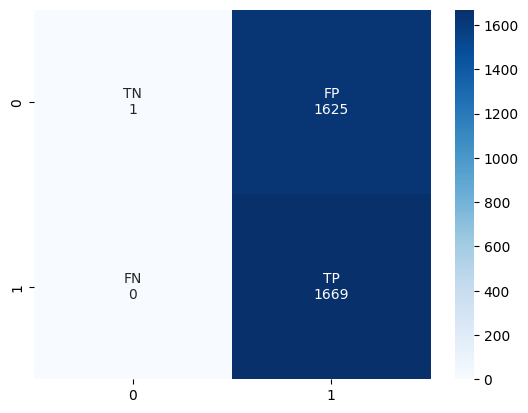

In [22]:
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred = classifier.predict(tfidf_test_vectors.toarray())
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

              precision    recall  f1-score   support

           A       0.56      0.59      0.57      1626
           B       0.57      0.54      0.56      1669

    accuracy                           0.57      3295
   macro avg       0.57      0.57      0.57      3295
weighted avg       0.57      0.57      0.56      3295



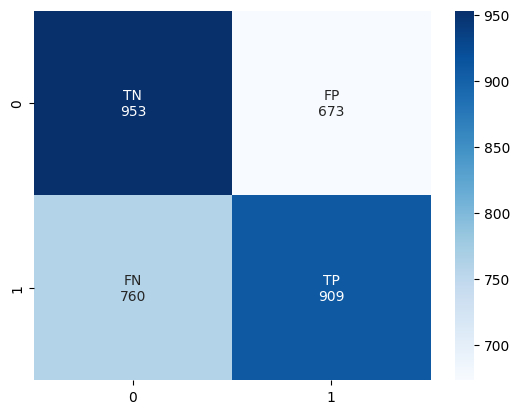

In [21]:
classifier = GaussianNB()
classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred = classifier.predict(tfidf_test_vectors.toarray())
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

              precision    recall  f1-score   support

           A       0.78      0.84      0.81      1626
           B       0.84      0.77      0.80      1669

    accuracy                           0.81      3295
   macro avg       0.81      0.81      0.81      3295
weighted avg       0.81      0.81      0.81      3295



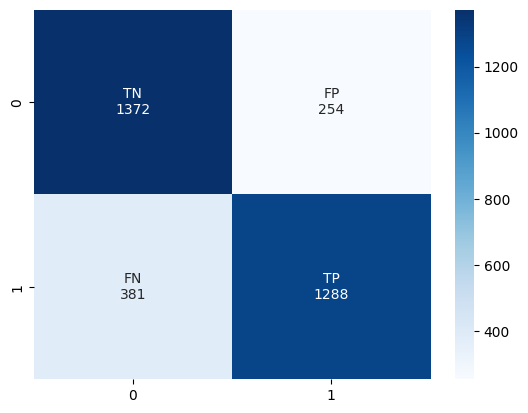

In [24]:
classifier = LogisticRegression()
classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred = classifier.predict(tfidf_test_vectors.toarray())
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

              precision    recall  f1-score   support

           A       0.69      0.70      0.70      1626
           B       0.71      0.69      0.70      1669

    accuracy                           0.70      3295
   macro avg       0.70      0.70      0.70      3295
weighted avg       0.70      0.70      0.70      3295



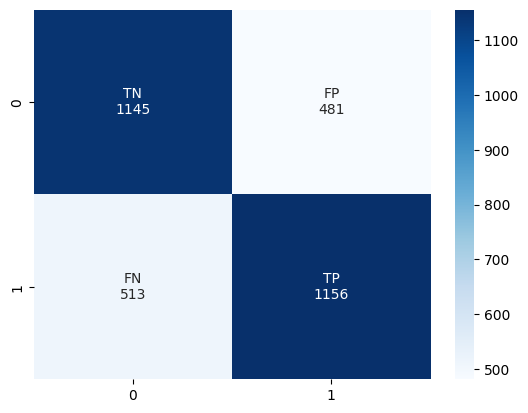

In [25]:
classifier = DecisionTreeClassifier()
classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred = classifier.predict(tfidf_test_vectors.toarray())
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

              precision    recall  f1-score   support

           A       0.77      0.84      0.80      1649
           B       0.82      0.74      0.78      1646

    accuracy                           0.79      3295
   macro avg       0.80      0.79      0.79      3295
weighted avg       0.80      0.79      0.79      3295



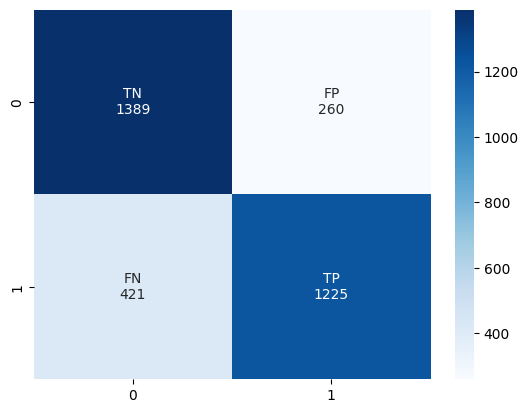

In [27]:
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors,y_train)
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');